In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
%matplotlib inline

data = pd.read_csv('ProgressDataOutputArchive/data_clean.csv')
del data['X']
data.head()

,InterIdNew,Weekend,TimeSlot,Left,Right,Straight,Latitude,Longitude
0,Atlanta_0,0,EveningBusy(16:00-20:00),0.000000,5.202937,0.0,33.79166,-84.43003
1,Atlanta_0,0,Midnight(22:00-07:00),0.824444,0.000000,0.0,33.79166,-84.43003
2,Atlanta_0,0,MorningBusy(07:00-10:00),9.147466,0.000000,0.0,33.79166,-84.43003
3,Atlanta_0,0,NormalDay(10:00-16:00),41.956263,0.000000,0.0,33.79166,-84.43003
4,Atlanta_0,0,NormalNight(20:00-22:00),0.000000,0.000000,0.0,33.79166,-84.43003


In [2]:
data['Weekend'].unique()

array([0, 1], dtype=int64)

In [3]:
data['TimeSlot'].unique()

array(['EveningBusy(16:00-20:00)', 'Midnight(22:00-07:00)',
       'MorningBusy(07:00-10:00)', 'NormalDay(10:00-16:00)',
       'NormalNight(20:00-22:00)'], dtype=object)

In [4]:
# output path
path = 'ProgressDataOutputArchive/CongestionPattern/'
if not os.path.exists(path):
    os.mkdir(path)

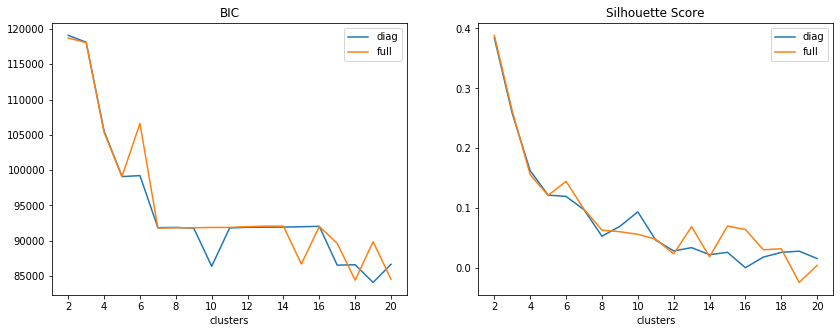

In [5]:
# Weekday Eveningbusy
new_data = data.loc[(data['Weekend']==0) & (data['TimeSlot']=='EveningBusy(16:00-20:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekday_EveningBusy.png')

In [6]:
new_data['cluster'] = GaussianMixture(6, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekday_EveningBusy.csv')
agg.to_csv(path+'Weekday_EveningBusy_agg.csv')
print("Weekday Eveningbusy")
agg

Weekday Eveningbusy


,Left,Right,Straight,count
cluster,,,,
0,24.560984,17.914522,0.000000,1143
1,55.726311,39.256005,35.591452,1224
2,113.004108,55.432168,70.625000,104
3,21.242214,32.418814,16.023844,798
4,32.240991,7.977863,17.588310,1162
5,70.322058,143.058704,39.787938,48


In [7]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekday_EveningBusy.html')

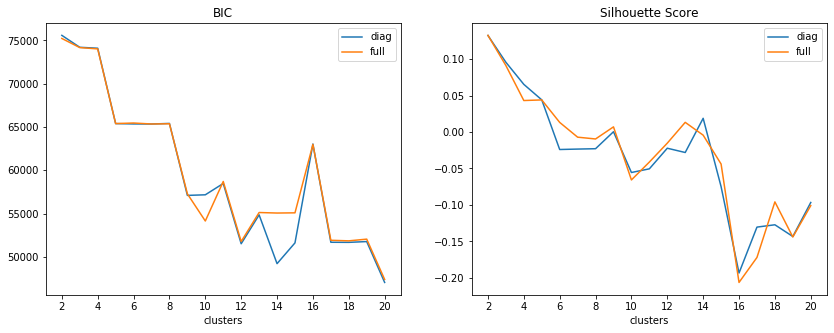

In [8]:
# Weekday Midnight
new_data = data.loc[(data['Weekend']==0) & (data['TimeSlot']=='Midnight(22:00-07:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekday_Midnight.png')

In [9]:
new_data['cluster'] = GaussianMixture(5, covariance_type='full', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekday_Midnight.csv')
agg.to_csv(path+'Weekday_Midnight_agg.csv')
print("Weekday Midnight")
agg

Weekday Midnight


,Left,Right,Straight,count
cluster,,,,
0,27.869482,0.000000,16.842598,498
1,22.559585,15.449181,0.000000,2035
2,93.648894,87.779734,49.983333,30
3,43.746351,37.538497,24.898682,884
4,23.212093,17.516811,13.431993,827


In [10]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekday_Midnight.html')

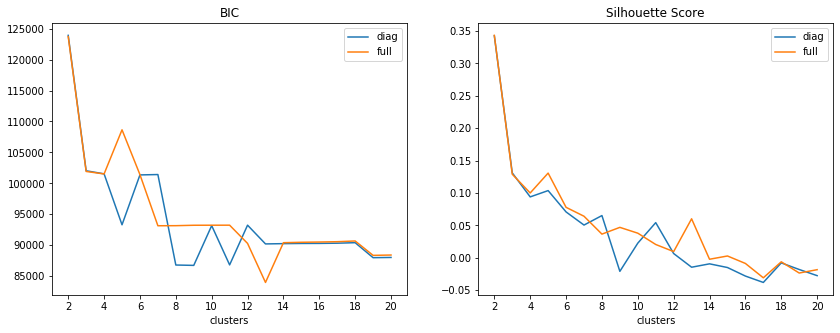

In [11]:
# Weekday Morningbusy
new_data = data.loc[(data['Weekend']==0) & (data['TimeSlot']=='MorningBusy(07:00-10:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekday_Morningbusy.png')

In [12]:
new_data['cluster'] = GaussianMixture(5, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekday_Morningbusy.csv')
agg.to_csv(path+'Weekday_Morningbusy_agg.csv')
print("Weekday Morningbusy")
agg

Weekday Morningbusy


,Left,Right,Straight,count
cluster,,,,
0,91.085681,102.146486,43.227273,77
1,30.485432,0.000000,19.334396,504
2,30.010383,24.345412,17.498860,1878
3,26.242253,17.572863,0.000000,1316
4,57.140528,43.564362,37.784704,930


In [13]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekday_Morningbusy.html')

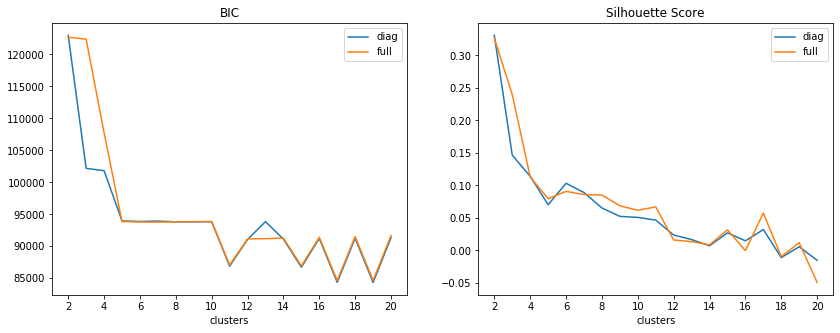

In [14]:
# Weekday Normalday
new_data = data.loc[(data['Weekend']==0) & (data['TimeSlot']=='NormalDay(10:00-16:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekday_Normalday.png')

In [15]:
new_data['cluster'] = GaussianMixture(6, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekday_Normalday.csv')
agg.to_csv(path+'Weekday_Normalday_agg.csv')
print("Weekday Normalday")
agg

Weekday Normalday


,Left,Right,Straight,count
cluster,,,,
0,21.312560,18.849868,0.000000,1080
1,48.088449,49.261878,32.731622,807
2,87.705066,64.783312,51.333333,132
3,22.195329,22.186059,15.063628,1314
4,33.625189,0.000000,13.315619,652
5,48.263305,20.762948,26.316911,751


In [16]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekday_Normalday.html')

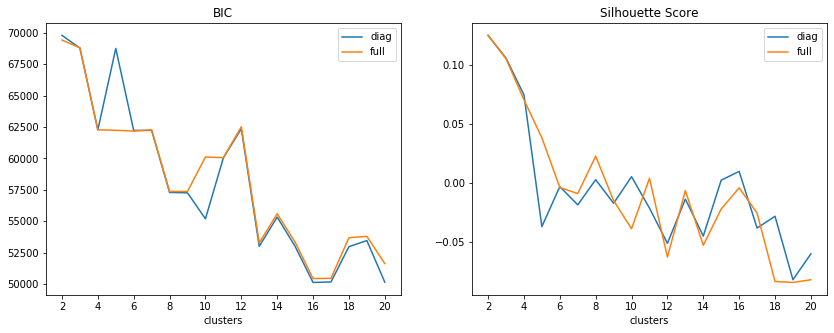

In [17]:
# Weekday Normalnight
new_data = data.loc[(data['Weekend']==0) & (data['TimeSlot']=='NormalNight(20:00-22:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekday_Normalnight.png')

In [18]:
new_data['cluster'] = GaussianMixture(6, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekday_Normalnight.csv')
agg.to_csv(path+'Weekday_Normalnight_agg.csv')
print("Weekday Normalnight")
agg

Weekday Normalnight


,Left,Right,Straight,count
cluster,,,,
0,23.680207,16.865807,0.000000,1419
1,28.265205,23.264601,23.189163,648
2,17.739880,21.987214,9.991658,486
3,28.603985,0.000000,17.621071,394
4,63.297115,23.157722,13.340359,179
5,52.258453,45.658831,34.977990,492


In [19]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekday_Normalnight.html')

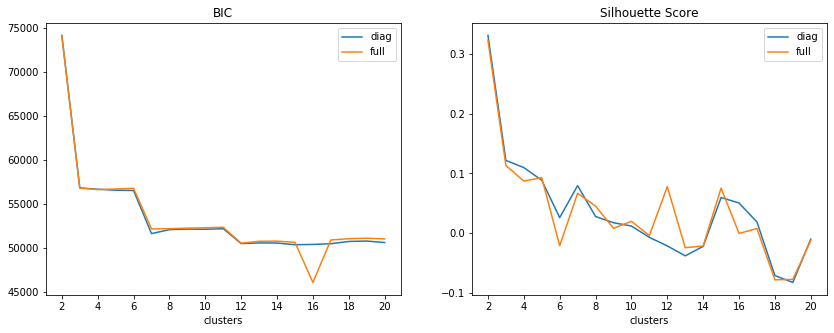

In [20]:
# Weekend Eveningbusy
new_data = data.loc[(data['Weekend']==1) & (data['TimeSlot']=='EveningBusy(16:00-20:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekend_Eveningbusy.png')

In [21]:
new_data['cluster'] = GaussianMixture(3, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekend_Eveningbusy.csv')
agg.to_csv(path+'Weekend_Eveningbusy_agg.csv')
print("Weekend Eveningbusy")
agg

Weekend Eveningbusy


,Left,Right,Straight,count
cluster,,,,
0,24.483946,17.822774,0.000000,1034
1,61.342153,48.549721,42.246198,362
2,30.674708,20.722905,18.009599,1449


In [22]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekend_Eveningbusy.html')

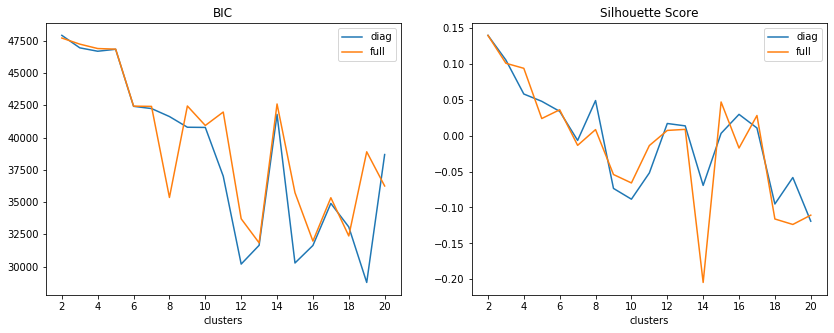

In [23]:
# Weekend Midnight
new_data = data.loc[(data['Weekend']==1) & (data['TimeSlot']=='Midnight(22:00-07:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekend_Midnight.png')

In [24]:
new_data['cluster'] = GaussianMixture(3, covariance_type='full', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekend_Midnight.csv')
agg.to_csv(path+'Weekend_Midnight_agg.csv')
print("Weekend Midnight")
agg

Weekend Midnight


,Left,Right,Straight,count
cluster,,,,
0,23.512393,16.734494,0.000000,1452
1,56.130570,26.075945,31.860931,428
2,24.494938,22.448361,15.073596,927


In [25]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekend_Midnight.html')

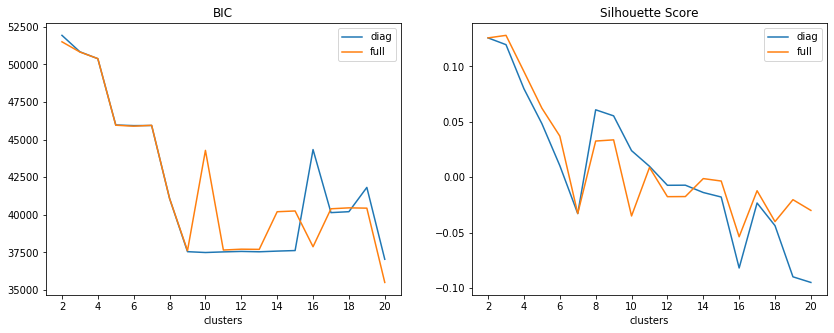

In [26]:
# Weekend Morningbusy
new_data = data.loc[(data['Weekend']==1) & (data['TimeSlot']=='MorningBusy(07:00-10:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekend_Morningbusy.png')

In [27]:
new_data['cluster'] = GaussianMixture(4, covariance_type='full', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekend_Morningbusy.csv')
agg.to_csv(path+'Weekend_Morningbusy_agg.csv')
print("Weekend Morningbusy")
agg

Weekend Morningbusy


,Left,Right,Straight,count
cluster,,,,
0,30.141869,12.894790,14.646871,896
1,45.051239,42.658434,29.780239,619
2,99.944833,330.333333,94.166667,3
3,24.690792,17.108278,0.000000,1289


In [28]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekend_Morningbusy.html')

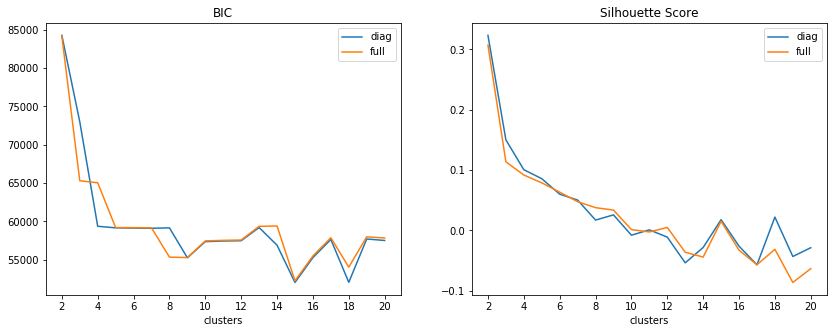

In [29]:
# Weekend Normalday
new_data = data.loc[(data['Weekend']==1) & (data['TimeSlot']=='NormalDay(10:00-16:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekend_Normalday.png')

In [30]:
new_data['cluster'] = GaussianMixture(4, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekend_Normalday.csv')
agg.to_csv(path+'Weekend_Normalday_agg.csv')
print("Weekend Normalday")
agg

Weekend Normalday


,Left,Right,Straight,count
cluster,,,,
0,31.686898,0.000000,16.845339,379
1,31.794563,26.643118,18.679536,1338
2,63.046682,51.348081,42.940362,401
3,22.368113,17.670888,0.000000,1111


In [31]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekend_Normalday.html')

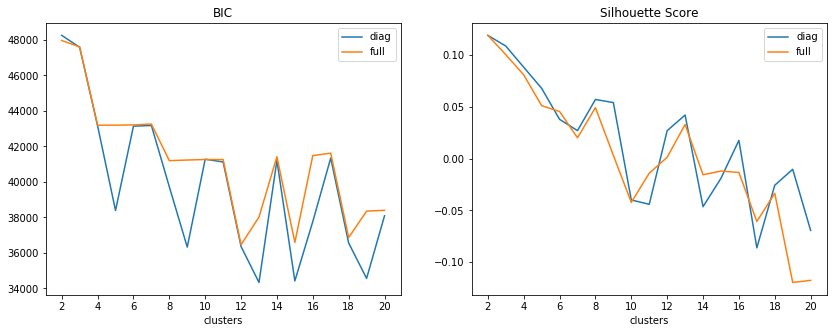

In [32]:
# Weekend Normalnight
new_data = data.loc[(data['Weekend']==1) & (data['TimeSlot']=='NormalNight(20:00-22:00)'),].copy()
X = new_data[['Left', 'Right', 'Straight']]

clusters = np.arange(2, 21)
models1 = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in clusters]
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in clusters]

fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(clusters, [m.bic(X) for m in models1], label='diag')
plt.plot(clusters, [m.bic(X) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('BIC')

plt.subplot2grid((1,2),(0,1))
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models1], label='diag')
plt.plot(clusters, [silhouette_score(X,m.predict(X),metric='minkowski',random_state=0) for m in models2], label='full')
plt.xticks(range(2,22,2))
plt.legend(loc='best')
plt.xlabel('clusters')
plt.title('Silhouette Score')

plt.savefig(path+'Weekend_Normalnight.png')

In [33]:
new_data['cluster'] = GaussianMixture(4, covariance_type='diag', random_state=0).fit(X).predict(X)
agg = pd.DataFrame(new_data.groupby('cluster')['Left','Right','Straight'].mean())
agg['count'] = new_data.groupby('cluster').count().iloc[:,1]
new_data.to_csv(path+'Weekend_Normalnight.csv')
agg.to_csv(path+'Weekend_Normalnight_agg.csv')
print("Weekend Normalnight")
agg

Weekend Normalnight


,Left,Right,Straight,count
cluster,,,,
0,29.896841,0.000000,16.390325,275
1,24.474187,23.877876,16.147758,781
2,55.804749,39.262300,33.123775,450
3,24.484829,17.405918,0.000000,1000


In [34]:
color = {0:'blue', 1:'crimson', 2:'orange', 3:'green', 4:'purple', 5: 'gray', 6: 'darkgreen', 7:'darkblue'}

new_data['avgtime'] = (new_data['Left']+ new_data['Right']+new_data['Straight'])/3

m = folium.Map(location=[33.773464, -84.392121], zoom_start=5)
for i in range(0,len(new_data)):
    folium.Circle(
      location=[new_data.iloc[i]['Latitude'], new_data.iloc[i]['Longitude']],
      radius=new_data.iloc[i]['avgtime']*2,
      color=color[new_data.iloc[i]['cluster']],
      fill=True,
      fill_color=color[new_data.iloc[i]['cluster']]
   ).add_to(m)

'''
legend_html = """
     <div style=”position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     “>&nbsp; Cool Legend <br>
     &nbsp; East &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:green”></i><br>
     &nbsp; West &nbsp; <i class=”fa fa-map-marker fa-2x”
                  style=”color:red”></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))
'''    

m.save(path+'Weekend_Normalnight.html')